<a href="https://colab.research.google.com/github/dsibi/practicum_data_example_repo/blob/master/determination_of_perspective_tariff/determination_of_perspective_tariff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Определение перспективного тарифа для телеком компании**

---



## Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

##Описание тарифов

Параметры | Тариф «Смарт» | Тариф «Ультра»
--- | --- | ---
Ежемесячная плата, *руб.* | 550 | 1950
Включено: минуты/сообщения/интернет| 500 / 50 / 15 | 3000 / 1000 / 30
Стоимость услуг сверх тарифного пакета, *руб.*: минуты/сообщения/интернет| 3 / 3 / 200 | 1 / 1 / 150

**Обратите внимание**: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

##Шаг 1. Откроем файлы с данными и изучим общую информацию

---



Импортируем все необходимые нам библиотеки, далее новые библиотеки будем добавлять сюда же

In [ ]:
import pandas as pd
from IPython.display import display
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.stats import weightstats as stests

Запуск импорта данных с Google Drive (при работе через Google Collabs)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Чтение файлов

In [ ]:
cls = pd.read_csv('/content/drive/My Drive/Edu/Data Analysis/5_Статистический анализ данных/!Project/data/calls.csv')
itnt = pd.read_csv('/content/drive/My Drive/Edu/Data Analysis/5_Статистический анализ данных/!Project/data/internet.csv')
trf = pd.read_csv('/content/drive/My Drive/Edu/Data Analysis/5_Статистический анализ данных/!Project/data/tariffs.csv')
usrs = pd.read_csv('/content/drive/My Drive/Edu/Data Analysis/5_Статистический анализ данных/!Project/data/users.csv')
msg = pd.read_csv('/content/drive/My Drive/Edu/Data Analysis/5_Статистический анализ данных/!Project/data/messages.csv')

Изучим по ним общую информацию 

In [ ]:
df_list = [usrs, cls, msg, itnt, trf]
for df in df_list:
  display(df.head())
  df.info()
  display(df.isna().sum())
  display(df.describe())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


id           0
call_date    0
duration     0
user_id      0
dtype: int64

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


id              0
message_date    0
user_id         0
dtype: int64

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Пропуски в таблице usrs в колонке churn_date обусловлены объективными причинами - пользователь все еще пользуется этим же тарифом.
В таблице cls имеются нулевые значения в колонке duration.
В таблице itnt имеется странная колонка Unnamed: 0, имеются нулевые значения в колонке mb_used.
Во всех таблицах содержащих дату необходимо поменять тип данных на соответствующий.

##Шаг 2. Подготовим данные

---



###Приведем данные к нужным типам

Найдем все таблицы содержащих дату и поменяем тип данных на соответствующий.

In [ ]:
for df in df_list:
    date_cols = [col for col in df.columns if 'date' in col]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col])

###Найдем и исправим ошибки в данных

Удалим из таблицы itnt странную колонку Unnamed: 0 - по ней отсутствуют данные в описании проекта.

In [ ]:
itnt = itnt.drop('Unnamed: 0',axis=1)
itnt.dtypes

id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

###Обработаем нулевые значения в данных

Удали в таблице cls и itnt нулевые значения в колонках duration и mb_used соответственно, т.к. нулевые значения никакой роли на финансовый результат не окажут.

In [ ]:
cls.drop(cls[cls['duration']==0].index, inplace=True)
itnt.drop(itnt[itnt['mb_used']==0].index, inplace=True)

###Посчитаем для каждого пользователя:

####Количество сделанных звонков и израсходованных минут разговора по месяцам

In [ ]:
cls.columns

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

In [ ]:
display(cls['call_date'].min())
display(cls['call_date'].max())

Timestamp('2018-01-01 00:00:00')

Timestamp('2018-12-31 00:00:00')

In [ ]:
cls['month']=pd.DatetimeIndex(cls['call_date']).month
print(cls[cls['user_id'].isin([1257])])

             id  call_date  duration  user_id  month
100605   1257_2 2018-10-02     14.16     1257     10
100606   1257_3 2018-06-26     18.49     1257      6
100607   1257_4 2018-12-19      0.91     1257     12
100609   1257_6 2018-10-19      0.90     1257     10
100610   1257_7 2018-06-27     15.98     1257      6
100615  1257_12 2018-12-22      7.03     1257     12
100616  1257_13 2018-11-07      5.42     1257     11


In [ ]:
cls['duration']=cls['duration'].apply(math.ceil)
cls.sample(15)

,id,call_date,duration,user_id,month
60703,1152_400,2018-09-30,7,1152,9
185513,1458_805,2018-04-02,1,1458,4
73534,1185_328,2018-05-11,7,1185,5
42991,1108_48,2018-12-13,11,1108,12
44820,1113_236,2018-10-16,10,1113,10
136706,1348_182,2018-12-05,14,1348,12
60909,1153_155,2018-12-28,1,1153,12
126209,1324_342,2018-10-15,11,1324,10
63784,1163_24,2018-11-15,6,1163,11
115777,1298_277,2018-08-31,2,1298,8


In [ ]:
cls_month_minutes = cls.pivot_table(index=['user_id', 'month'], values='duration',aggfunc='sum').reset_index()
print(cls_month_minutes[cls_month_minutes['user_id'].isin([1257])])

      user_id  month  duration
1603     1257      6        35
1604     1257     10        16
1605     1257     11         6
1606     1257     12         9


In [ ]:
def check_calc(data1, data2):
  data1=data1.round()
  data2=data2.round()
  if data1==data2:
    return print('Проверка расчетов пройдена успешно')
  else:
    print('Имеются расхождения')

check_calc(cls['duration'].sum(),cls_month_minutes['duration'].sum())

Проверка расчетов пройдена успешно


In [ ]:
cls_month_num = cls.groupby(['user_id','month'])[['id']].agg(['count']).reset_index()
cls_month_num.columns = ['user_id','month','calls_num']
print(cls_month_num[cls_month_num['user_id'].isin([1257])])

      user_id  month  calls_num
1603     1257      6          2
1604     1257     10          2
1605     1257     11          1
1606     1257     12          2


In [ ]:
cls_month = cls_month_num.merge(cls_month_minutes,how='left',on=['user_id','month'])
print(cls_month[cls_month['user_id'].isin([1257])])

      user_id  month  calls_num  duration
1603     1257      6          2        35
1604     1257     10          2        16
1605     1257     11          1         6
1606     1257     12          2         9


####Количество отправленных сообщений по месяцам

In [ ]:
msg.columns

Index(['id', 'message_date', 'user_id'], dtype='object')

In [ ]:
msg['month']=pd.DatetimeIndex(msg['message_date']).month
msg_month = msg.groupby(['user_id','month'])[['id']].agg(['count']).reset_index()
msg_month.columns = ['user_id','month','msgs_num']
print(msg_month[msg_month['user_id'].isin([1257])])

      user_id  month  msgs_num
1313     1257      6        62
1314     1257      7       146
1315     1257      8       157
1316     1257      9       153
1317     1257     10       131
1318     1257     11       133
1319     1257     12       135


In [ ]:
check_calc(msg['id'].count(),msg_month['msgs_num'].sum())

Проверка расчетов пройдена успешно


####Объем израсходованного интернет-трафика по месяцам

In [ ]:
itnt.columns

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [ ]:
itnt['month']=pd.DatetimeIndex(itnt['session_date']).month
itnt_month = itnt.pivot_table(index=['user_id', 'month'], values='mb_used',aggfunc='sum').reset_index()
print(itnt_month[itnt_month['user_id'].isin([1257])])

      user_id  month   mb_used
1628     1257      6  11774.26
1629     1257      7  20014.22
1630     1257      8  25482.16
1631     1257      9  22753.12
1632     1257     10  20338.15
1633     1257     11  26247.35
1634     1257     12  27752.24


In [ ]:
check_calc(itnt['mb_used'].sum(),itnt_month['mb_used'].sum())

Проверка расчетов пройдена успешно


In [ ]:
itnt_month['gb_used']=(itnt_month['mb_used']/1024).apply(math.ceil)
itnt_month = itnt_month.drop('mb_used',axis=1)
print(itnt_month[itnt_month['user_id'].isin([1257])])

      user_id  month  gb_used
1628     1257      6       12
1629     1257      7       20
1630     1257      8       25
1631     1257      9       23
1632     1257     10       20
1633     1257     11       26
1634     1257     12       28


####Помесячная выручка с каждого пользователя 

In [ ]:
usrs.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножем на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.
Для этого сначала создадим таблицу revenue, куда будем добавлять все необходимые нам данные.

In [ ]:
revenue = usrs[['user_id', 'tariff']].copy()
rate = []
for tariff in revenue['tariff']:
  if tariff=='smart':
    rate.append(trf.loc[trf['tariff_name']=='smart', 'rub_monthly_fee'].values[0])
  else:
    rate.append(trf.loc[trf['tariff_name']=='ultra', 'rub_monthly_fee'].values[0])
revenue['monthly_fee']=rate
revenue

,user_id,tariff,monthly_fee
0,1000,ultra,1950
1,1001,smart,550
2,1002,smart,550
3,1003,ultra,1950
4,1004,ultra,1950
...,...,...,...
495,1495,ultra,1950
496,1496,smart,550
497,1497,smart,550
498,1498,smart,550


Соберем все выделенные ранее данные по услугам вместе.

In [ ]:
all_data = cls_month_minutes[['user_id', 'month', 'duration']]
for df in [msg_month, itnt_month]:
    all_data=all_data.merge(df, how='outer', on=['user_id', 'month'])
print(all_data[all_data['user_id'].isin([1257])])

      user_id  month  duration  msgs_num  gb_used
1603     1257      6      35.0      62.0     12.0
1604     1257     10      16.0     131.0     20.0
1605     1257     11       6.0     133.0     26.0
1606     1257     12       9.0     135.0     28.0
3193     1257      7       NaN     146.0     20.0
3194     1257      8       NaN     157.0     25.0
3195     1257      9       NaN     153.0     23.0


Заменим образовавшиеся пустые значения нулями.

In [ ]:
all_data.fillna(0, inplace = True)
print(all_data[all_data['user_id'].isin([1257])])

      user_id  month  duration  msgs_num  gb_used
1603     1257      6      35.0      62.0     12.0
1604     1257     10      16.0     131.0     20.0
1605     1257     11       6.0     133.0     26.0
1606     1257     12       9.0     135.0     28.0
3193     1257      7       0.0     146.0     20.0
3194     1257      8       0.0     157.0     25.0
3195     1257      9       0.0     153.0     23.0


Произведем финальное объединение.

In [ ]:
revenue = revenue.merge(all_data, how='right', on=['user_id'])
print(revenue[revenue['user_id'].isin([1257])])

      user_id tariff  monthly_fee  month  duration  msgs_num  gb_used
1604     1257  ultra         1950      6      35.0      62.0     12.0
1605     1257  ultra         1950     10      16.0     131.0     20.0
1606     1257  ultra         1950     11       6.0     133.0     26.0
1607     1257  ultra         1950     12       9.0     135.0     28.0
1608     1257  ultra         1950      7       0.0     146.0     20.0
1609     1257  ultra         1950      8       0.0     157.0     25.0
1610     1257  ultra         1950      9       0.0     153.0     23.0


Рассчитаем количество перерасходованных минут, СМС и Гб.

In [ ]:
def extra_mins_fee(row):
  duration = row['duration']
  tariff = row['tariff']
  free_mins_s=trf.loc[trf['tariff_name']=='smart', 'minutes_included'].values[0]
  free_mins_u=trf.loc[trf['tariff_name']=='ultra', 'minutes_included'].values[0]
  fix_mins_s=trf.loc[trf['tariff_name']=='smart', 'rub_per_minute'].values[0]
  fix_mins_u=trf.loc[trf['tariff_name']=='ultra', 'rub_per_minute'].values[0]
  extra_mins_fee=0
  if row['tariff'] == 'smart':
    extra_mins_fee=max(duration - free_mins_s,0)*fix_mins_s
    return extra_mins_fee
  else:
    extra_mins_fee=max(duration - free_mins_u,0)*fix_mins_u
    return extra_mins_fee

revenue['extra_mins_fee'] = revenue.apply(extra_mins_fee, axis = 1)
revenue.sample(15)

,user_id,tariff,monthly_fee,month,duration,msgs_num,gb_used,extra_mins_fee
1443,1228,smart,550,6,611.0,0.0,19.0,333.0
1602,1256,smart,550,11,499.0,91.0,19.0,0.0
3204,1473,ultra,1950,8,0.0,17.0,13.0,0.0
2376,1378,smart,550,7,517.0,12.0,12.0,51.0
2093,1334,smart,550,12,386.0,0.0,26.0,0.0
2371,1378,smart,550,2,548.0,13.0,11.0,144.0
1170,1185,ultra,1950,9,832.0,0.0,42.0,0.0
2598,1409,smart,550,9,733.0,34.0,18.0,699.0
2621,1413,smart,550,9,169.0,2.0,22.0,0.0
1742,1280,smart,550,7,354.0,20.0,7.0,0.0


In [ ]:
def extra_msgs_fee(row):
  msgs_num = row['msgs_num']
  tariff = row['tariff']
  free_msgs_s=trf.loc[trf['tariff_name']=='smart', 'messages_included'].values[0]
  free_msgs_u=trf.loc[trf['tariff_name']=='ultra', 'messages_included'].values[0]
  fix_msgs_s=trf.loc[trf['tariff_name']=='smart', 'rub_per_message'].values[0]
  fix_msgs_u=trf.loc[trf['tariff_name']=='ultra', 'rub_per_message'].values[0]
  extra_msgs_fee=0
  if row['tariff'] == 'smart':
    extra_msgs_fee=max(msgs_num - free_msgs_s,0)*fix_msgs_s
    return extra_msgs_fee
  else:
    extra_msgs_fee=max(msgs_num - free_msgs_u,0)*fix_msgs_u
    return extra_msgs_fee

revenue['extra_msgs_fee'] = revenue.apply(extra_msgs_fee, axis = 1)
revenue.sample(15)

,user_id,tariff,monthly_fee,month,duration,msgs_num,gb_used,extra_mins_fee,extra_msgs_fee
2880,1454,smart,550,7,520.0,28.0,15.0,60.0,0.0
1240,1196,ultra,1950,9,1139.0,154.0,28.0,0.0,0.0
1357,1215,smart,550,12,567.0,17.0,17.0,201.0,0.0
277,1045,smart,550,3,229.0,58.0,14.0,0.0,24.0
2671,1421,smart,550,8,389.0,49.0,20.0,0.0,0.0
2583,1407,smart,550,12,291.0,41.0,17.0,0.0,0.0
2726,1428,smart,550,12,382.0,0.0,27.0,0.0,0.0
1582,1253,ultra,1950,11,147.0,84.0,16.0,0.0,0.0
900,1145,smart,550,11,367.0,101.0,12.0,0.0,153.0
589,1094,ultra,1950,10,868.0,28.0,18.0,0.0,0.0


In [ ]:
def extra_gb_fee(row):
  traffic = row['gb_used']
  tariff = row['tariff']
  free_gb_s=trf.loc[trf['tariff_name']=='smart', 'mb_per_month_included'].values[0]/1024
  free_gb_u=trf.loc[trf['tariff_name']=='ultra', 'mb_per_month_included'].values[0]/1024
  fix_gb_s=trf.loc[trf['tariff_name']=='smart', 'rub_per_gb'].values[0]
  fix_gb_u=trf.loc[trf['tariff_name']=='ultra', 'rub_per_gb'].values[0]
  extra_gb_fee=0
  if row['tariff'] == 'smart':
    extra_gb_fee=max(traffic - free_gb_s,0)*fix_gb_s
    return extra_gb_fee
  else:
    extra_gb_fee=max(traffic - free_gb_u,0)*fix_gb_u
    return extra_gb_fee

revenue['extra_gb_fee'] = revenue.apply(extra_gb_fee, axis = 1)
revenue.sample(15)

,user_id,tariff,monthly_fee,month,duration,msgs_num,gb_used,extra_mins_fee,extra_msgs_fee,extra_gb_fee
1906,1303,ultra,1950,11,563.0,32.0,18.0,0.0,0.0,0.0
2888,1455,ultra,1950,5,595.0,7.0,17.0,0.0,0.0,0.0
2532,1400,smart,550,9,453.0,51.0,19.0,0.0,3.0,800.0
334,1054,smart,550,6,527.0,69.0,19.0,81.0,57.0,800.0
192,1030,smart,550,7,328.0,101.0,13.0,0.0,153.0,0.0
1355,1215,smart,550,10,329.0,16.0,14.0,0.0,0.0,0.0
2505,1395,smart,550,3,668.0,33.0,21.0,504.0,0.0,1200.0
581,1093,smart,550,10,789.0,79.0,21.0,867.0,87.0,1200.0
294,1047,smart,550,12,822.0,73.0,27.0,966.0,69.0,2400.0
1713,1275,smart,550,4,120.0,8.0,3.0,0.0,0.0,0.0


Произведем финальный расчет помесячной выручки по каждому клиенту.

In [ ]:
revenue['total_fee'] = revenue['monthly_fee']+revenue['extra_mins_fee']+revenue['extra_msgs_fee']+revenue['extra_gb_fee']
revenue.sample(15)

,user_id,tariff,monthly_fee,month,duration,msgs_num,gb_used,extra_mins_fee,extra_msgs_fee,extra_gb_fee,total_fee
815,1130,smart,550,8,499.0,60.0,17.0,0.0,30.0,400.0,980.0
1006,1160,smart,550,12,365.0,30.0,14.0,0.0,0.0,0.0,550.0
2364,1377,ultra,1950,7,1311.0,13.0,5.0,0.0,0.0,0.0,1950.0
2480,1393,smart,550,2,171.0,16.0,7.0,0.0,0.0,0.0,550.0
615,1098,smart,550,12,588.0,14.0,36.0,264.0,0.0,4200.0,5014.0
1420,1225,ultra,1950,11,612.0,0.0,17.0,0.0,0.0,0.0,1950.0
1642,1264,smart,550,4,95.0,2.0,5.0,0.0,0.0,0.0,550.0
915,1147,smart,550,12,340.0,29.0,24.0,0.0,0.0,1800.0,2350.0
739,1118,smart,550,12,626.0,0.0,14.0,378.0,0.0,0.0,928.0
1180,1186,smart,550,8,613.0,73.0,12.0,339.0,69.0,0.0,958.0


##Шаг 3. Проанализируем данные

---



###Среднее количество минут, СМС и объем интернет-трафика для каждого тарифов месяц


In [ ]:
smart = revenue.query('tariff=="smart"')
ultra = revenue.query('tariff=="ultra"')
print('Количество минут разговора в месяц на тарифе "Смарт" составляет - {:.0f}'.format(smart['duration'].sum()/12),', на тарифе "Ультра" - {:.0f}'.format(ultra['duration'].sum()/12))
print('Количество сообщений в месяц на тарифе "Смарт" составляет - {:.0f}'.format(smart['msgs_num'].sum()/12),', на тарифе "Ультра" - {:.0f}'.format(ultra['msgs_num'].sum()/12))
print('Объем трафика (в Гб) в месяц на тарифе "Смарт" составляет - {:.0f}'.format(smart['gb_used'].sum()/12),', на тарифе "Ультра" - {:.0f}'.format(ultra['gb_used'].sum()/12))

Количество минут разговора в месяц на тарифе "Смарт" составляет - 77631 , на тарифе "Ультра" - 43227
Количество сообщений в месяц на тарифе "Смарт" составляет - 6201 , на тарифе "Ультра" - 4052
Объем трафика (в Гб) в месяц на тарифе "Смарт" составляет - 3033 , на тарифе "Ультра" - 1600


###Посчитаем среднее количество, дисперсию и стандартное отклонение


In [ ]:
metrics=revenue.groupby(['tariff']).agg({'total_fee' : ['mean', lambda x: np.var(x, ddof=1), lambda x: np.std(x, ddof=1)]}).reset_index().round(2)
metrics.set_axis(['tariff', 'total_fee', 'var', 'std'], axis = 'columns', inplace = True)
metrics

,tariff,total_fee,var,std
0,smart,1289.97,669785.71,818.40
1,ultra,2070.15,141516.75,376.19


Построим диаграммы размаха для каждого тарифа.

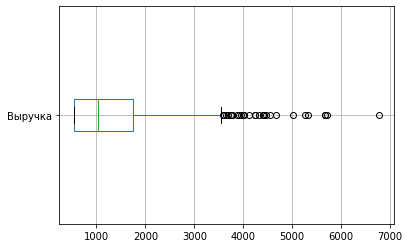

In [ ]:
ax=smart[['total_fee']].boxplot(vert=False)
ax.set_yticklabels(['Выручка'])
plt.show()

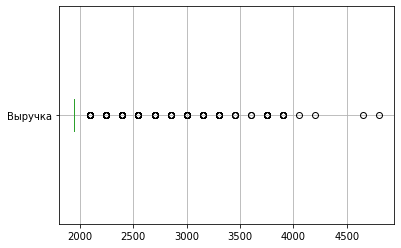

In [ ]:
ax=ultra[['total_fee']].boxplot(vert=False)
ax.set_yticklabels(['Выручка'])
plt.show()

Рассчитаем максимальные значения с применением правил трех сигм, все что больше будем считать выбросами.

In [ ]:
parameters_s = smart[['total_fee']].describe().T
q1_s, q2_s = parameters_s['25%'][0], parameters_s['75%'][0]
iqr_s = q2_s - q1_s
max_value_s = q2_s + 3*iqr_s
max_value_s

5350.0

In [ ]:
parameters_s

,count,mean,std,min,25%,50%,75%,max
total_fee,2229.0,1289.973531,818.404367,550.0,550.0,1023.0,1750.0,6770.0


In [ ]:
parameters_u = ultra[['total_fee']].describe().T
q1_u, q2_u = parameters_u['25%'][0], parameters_u['75%'][0]
iqr_u = q2_u - q1_u
max_value_u = q2_u + 3*iqr_u
max_value_u

1950.0

In [ ]:
parameters_u

,count,mean,std,min,25%,50%,75%,max
total_fee,985.0,2070.152284,376.187114,1950.0,1950.0,1950.0,1950.0,4800.0


###Построим гистограммы


####Минуты разговора


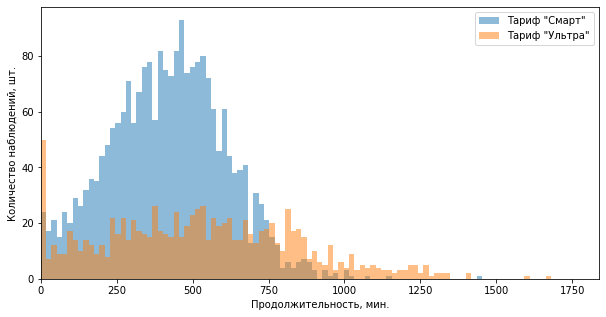

In [ ]:
plt.figure(figsize = (10,5))
plt.hist(revenue.query('tariff == "smart"')['duration'], bins=100, alpha=0.5, label='Тариф "Смарт"', range = (0, 1750))
plt.hist(revenue.query('tariff == "ultra"')['duration'], bins=100, alpha=0.5, label='Тариф "Ультра"', range = (0, 1750))
plt.legend(loc='best')
plt.xlim(left = 0)
plt.xlabel('Продолжительность, мин.')
plt.ylabel('Количество наблюдений, шт.')
plt.show()

Скачки на нулях вызваны отсутствием клиентами совершаемых звонков в рамках тарифа. По тарифу "Смарт" пиковые значения приходятся на 280, 400 и 470 минут. Пиковое значение по тарифу "Ультра" - 540 минут. Основная масса клиентов совершает звонки в диапазоне от 250 до 870 минут. В обоих распределениях имеются "большие хвосты вправо", что говорит о том, что основной объем минут находится в левой части, т.е. с более низкими значениями.

####Сообщения


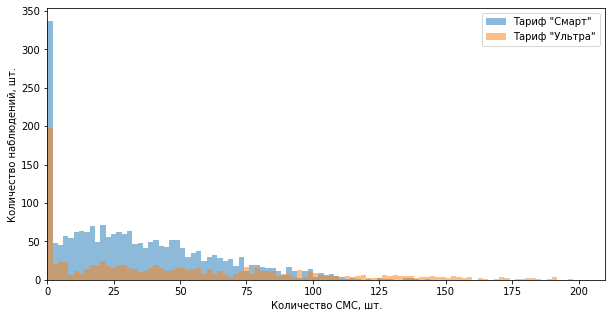

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.hist(revenue.query('tariff == "smart"')['msgs_num'], bins=100, alpha=0.5, label='Тариф "Смарт"', range = (0, 200))
plt.hist(revenue.query('tariff == "ultra"')['msgs_num'], bins=100, alpha=0.5, label='Тариф "Ультра"', range = (0, 200))
plt.legend(loc='best')
plt.xlim(left = 0)
plt.xlabel('Количество СМС, шт.')
plt.ylabel('Количество наблюдений, шт.')
plt.show()

Скачки на нулях вызваны отсутствием клиентами отправляемых СМС в рамках тарифа. По обоим тарифам почти никто не отправляет более 100 СМС в месяц. В обоих распределениях имеются "большие хвосты вправо", что говорит о том, что основной объем отправляемых СМС находится в левой части, т.е. с более низкими значениями.

####Интернет-трафик


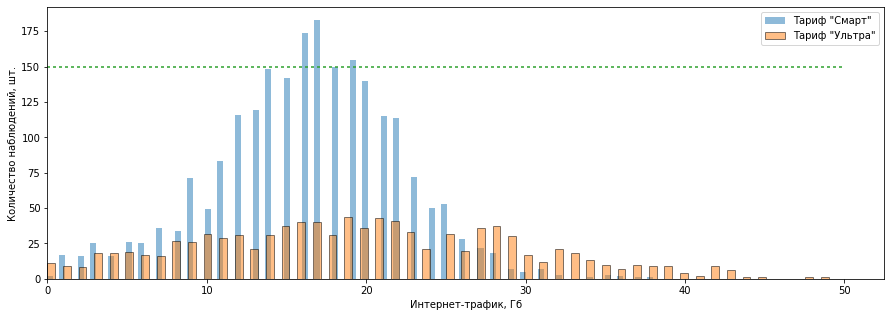

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.hist(revenue.query('tariff == "smart"')['gb_used'], bins=100, alpha=0.5, label='Тариф "Смарт"')
plt.hist(revenue.query('tariff == "ultra"')['gb_used'], bins=100, alpha=0.5, label='Тариф "Ультра"', ec="k")
plt.plot([0, 50], [150, 150],dashes=[2, 2])
plt.xlim(left = 0)
plt.legend(loc='best')
plt.xlabel('Интернет-трафик, Гб')
plt.ylabel('Количество наблюдений, шт.')
plt.show()

Скачков на нулях почти не наблюдается. По тарифу "Смарт" пиковое значение приходятся на 17 Гб. Пиковое значение по тарифу "Ультра" - на 19-21 Гб. Можно отметить, что в целом графики интернет-траффика имеют нормальное распределение с минимальным количеством выбросов.

##Шаг 4. Проверим гипотезы

---



При проверке гипотез о равенстве среднего будем применять метод Z-тест (z-критерий Фишера), т.к. будем проводить сравнения двух независимых выборок большого размера.
Критический уровень статистической значимости примем равным 5%.

###Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

*   H0 - средняя выручка пользователей тарифов «Смарт» и «Ультра» не различается
*   H1 - средняя выручка пользователей тарифов «Смарт» и «Ультра» различается

In [ ]:
alpha=0.05
ztest, pval1 = stests.ztest(revenue.query("tariff=='smart'")['total_fee'],
                            revenue.query("tariff=='ultra'")['total_fee'])
print('p-value:', float(pval1))
if pval1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 4.895078462039953e-180
Отвергаем нулевую гипотезу


Средняя выручка пользователей тарифов «Смарт» и «Ультра» различается, так как значение статистической  значимости меньше критического уровня статистической значимости.

###Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

*   H0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
*   H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [ ]:
revenue_cities=revenue.merge(usrs,how='left',on=['user_id'])
alpha=0.05
ztest, pval1 = stests.ztest(revenue_cities.query('city=="Москва"')['total_fee'],
                            revenue_cities.query('city!="Москва"')['total_fee'])
print('p-value:', float(pval1))
if pval1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.5439724029827072
Не получилось отвергнуть нулевую гипотезу


Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, так как значение статистической  значимости больше критического уровня статистической значимости.

##Шаг 5. Общий вывод

---



При работе с проектом были выполнены следующие шаги:
1. Предобработка данных: данные приведены к нужным типам, найдены и исправлены ошибки в данных, обработаны нулевые значения в данных.
2. Посчитаны для каждого пользователя:
*   количество сделанных звонков и израсходованных минут разговора по месяцам;
*   количество отправленных сообщений по месяцам;
*   объем израсходованного интернет-трафика по месяцам;
*   помесячная выручка с каждого пользователя.
3. Проведен статистический анализ данных:
*   описано поведение клиентов оператора, исходя из выборки;
*   подсчитано сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц;*   подсчитаны среднее количество, дисперсия и стандартное отклонение;
*   построены гистограммы;
*   опишисаны распределения.
4. Проверены гипотезы:


*   средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
*   средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.



Количество минут разговора в месяц на тарифе "Смарт" составляет - 77631, на тарифе "Ультра" - 43227.
Количество сообщений в месяц на тарифе "Смарт" составляет - 6201, на тарифе "Ультра" - 4052.
Объем трафика (в Гб) в месяц на тарифе "Смарт" составляет - 3033, на тарифе "Ультра" - 1600.

В тарифе "Ультра" практически никто не выходит за рамки пределы лимитов, тогда как в тарифе "Смарт" при стоимости 550 руб. в месяц разброс относительно большой, а мат. ожидание равно 818 руб.
Нормальные значения для тарифа "Смарт" от 550 руб. до 1 750 руб., прочие можем считать выбросами. Максимально допустимое значение у тарифа "Смарт" - 5 350 руб.
Для тарифа Ultra нормальное значение - цена тарифа, 1 950р.

Проверка гипотезы только подтвердила, что различия в средних неслучайны. Также выявили, что выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.